In [73]:
import json
from collections import Counter
from matplotlib import pyplot as plt
import statistics
%matplotlib inline

In [24]:
jsons = []
with open("dataset/tip.json") as f:
    for line in f:
        jsons.append(json.loads(line))


In [25]:
print(jsons[1].keys())
print(len(jsons))
likes = set()
businesses = set()
users = set()
for review in jsons:
    likes.add(review['likes'])
    businesses.add(review['business_id'])
    users.add(review['user_id'])
print("Types of likes:", likes)
print("Number of unique users:", len(users))
print("Number of unique businesses:", len(businesses))


dict_keys(['text', 'date', 'likes', 'business_id', 'user_id'])
1028802
Types of likes: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 15}
Number of unique users: 244632
Number of unique businesses: 104412


In [26]:
print(json.dumps(jsons[:10], indent=4, sort_keys=True))

[
    {
        "business_id": "tJRDll5yqpZwehenzE2cSg",
        "date": "2012-07-15",
        "likes": 0,
        "text": "Get here early enough to have dinner.",
        "user_id": "zcTZk7OG8ovAmh_fenH21g"
    },
    {
        "business_id": "jH19V2I9fIslnNhDzPmdkA",
        "date": "2015-08-12",
        "likes": 0,
        "text": "Great breakfast large portions and friendly waitress. I highly recommend it",
        "user_id": "ZcLKXikTHYOnYt5VYRO5sg"
    },
    {
        "business_id": "dAa0hB2yrnHzVmsCkN4YvQ",
        "date": "2014-06-20",
        "likes": 0,
        "text": "Nice place. Great staff.  A fixture in the township forever",
        "user_id": "oaYhjqBbh18ZhU0bpyzSuw"
    },
    {
        "business_id": "dAa0hB2yrnHzVmsCkN4YvQ",
        "date": "2016-10-12",
        "likes": 0,
        "text": "Happy hour 5-7 Monday - Friday",
        "user_id": "ulQ8Nyj7jCUR8M83SUMoRQ"
    },
    {
        "business_id": "ESzO3Av0b1_TzKOiqzbQYQ",
        "date": "2017-01-28",
        

In [55]:
likes_list = []
businesses_list = []
users_list = []
for review in jsons:
    likes_list.append(review['likes'])
    businesses_list.append(review['business_id'])
    users_list.append(review['user_id'])
likes_count = Counter(likes_list)
businesses_count = list(map(lambda x: x[1], Counter(businesses_list).items()))
users_count = list(map(lambda x: x[1], Counter(users_list).items()))


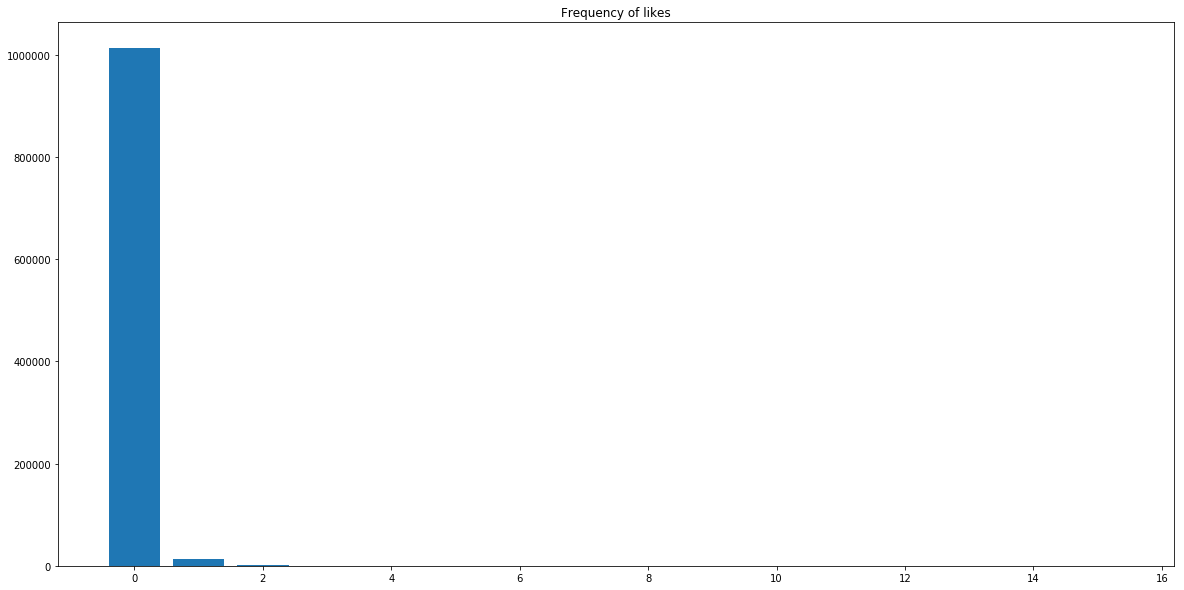

In [32]:

plt.figure(figsize=(20,10))
plt.bar(likes_count.keys(), likes_count.values())
plt.title("Frequency of likes")
plt.show()


In [57]:
av_num_business_reviews = statistics.mean(businesses_count)
print("Average number of reviews per company:",av_num_business_reviews)

av_num_users_reviews = statistics.mean(users_count)
print("Average number of reviews per company:",av_num_users_reviews)

Average number of reviews per company: 9.85329272497414
Average number of reviews per company: 4.205508682429118


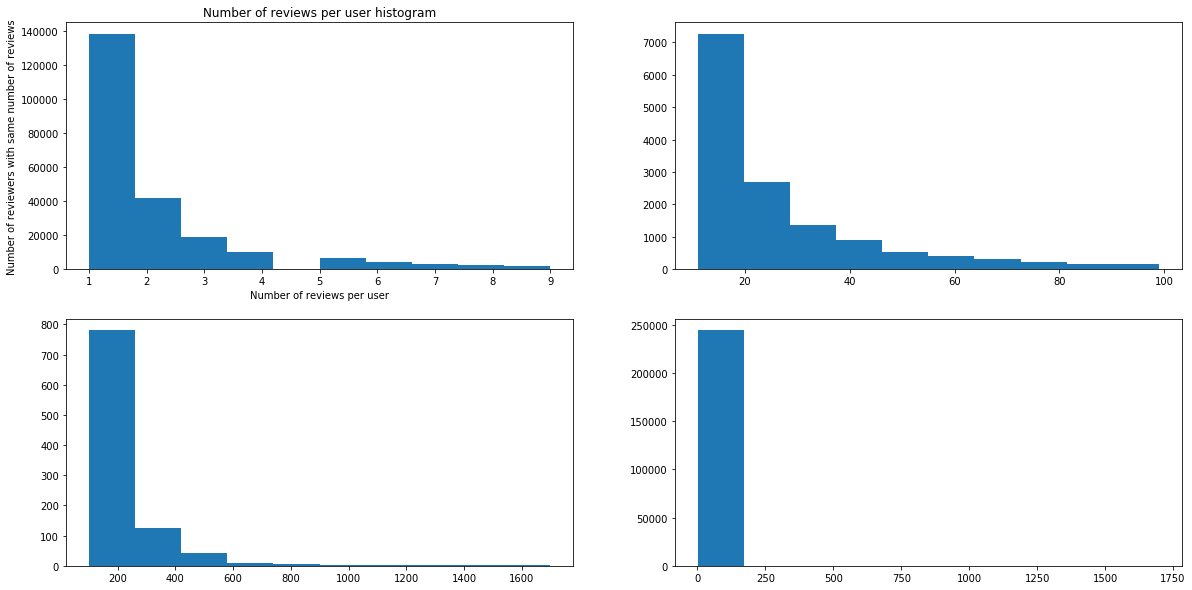

In [87]:
plt.figure(figsize=(20,10))

plt.subplot(221)
plt.title("Number of reviews per user histogram")
plt.xlabel("Number of reviews per user")
plt.ylabel('Number of reviewers with same number of reviews')
plt.hist(list(filter(lambda x: x < 10, users_count)))
plt.subplot(222)
plt.hist(list(filter(lambda x: x > 10 and x < 100, users_count)))
plt.subplot(223)
plt.hist(list(filter(lambda x: x > 100, users_count)))
plt.subplot(224)
plt.hist(users_count)

plt.show()



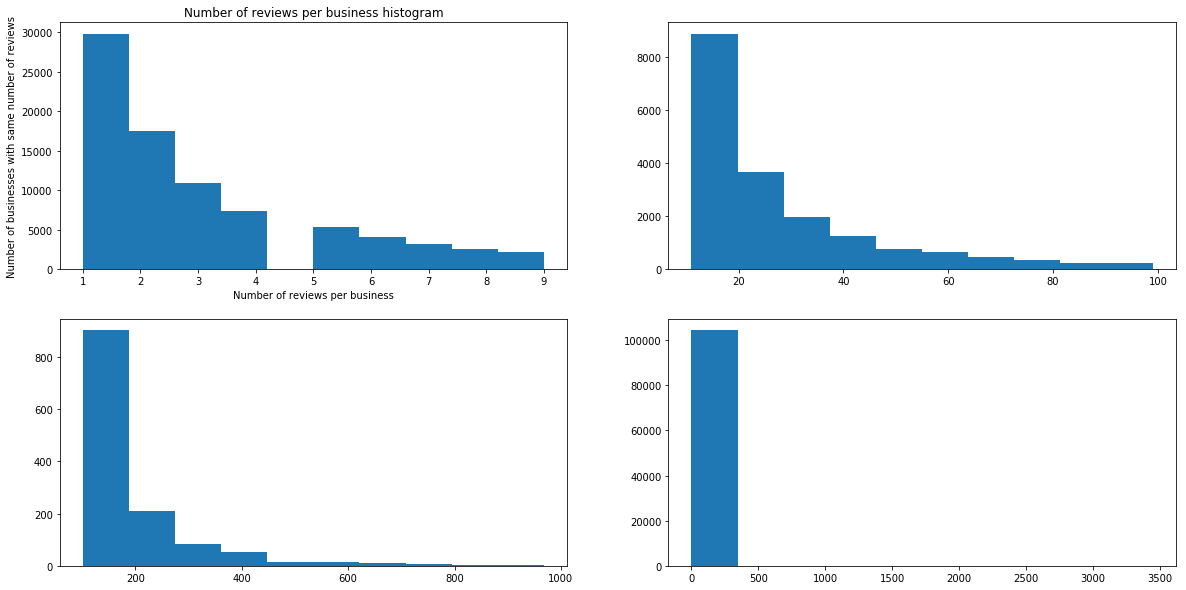

In [89]:
plt.figure(figsize=(20,10))

plt.subplot(221)
plt.title("Number of reviews per business histogram")
plt.xlabel("Number of reviews per business")
plt.ylabel('Number of businesses with same number of reviews')
plt.hist(list(filter(lambda x: x < 10, businesses_count)))
plt.subplot(222)
plt.hist(list(filter(lambda x: x > 10 and x < 100, businesses_count)))
plt.subplot(223)
plt.hist(list(filter(lambda x: x > 100 and x < 1000, businesses_count)))
plt.subplot(224)
plt.hist(businesses_count)

plt.show()

